In [2]:
import pandas as pd

In [3]:
#Cargar datos csv
data = pd.read_csv('HR_comma_sep.csv')

In [4]:
# Función para exploración de los datos
def df_exploration(df):
    # Revisión básica de los datos
    print(df.info())  # Para revisar los tipos de datos
    print(f"\nValores duplicados: {df.duplicated().sum()}")  # Revisa si hay duplicados en los datasets
    print(f"\nValores nulos: \n{df.isnull().sum()}") # Revisar valores nulos
    print (f"\nValores unicos: \n{df.nunique()}") # Revisar valores unicos
    return df

In [ ]:
df_exploration(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Valores duplicados: 3008

Valores nulos: 
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident         

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
# Eliminar datos duplicados
data = data.drop_duplicates()

In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Standardize the column names
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data['time_spend_company'].value_counts() 

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [11]:
data['number_project'].value_counts() 

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

In [ ]:
data['work_accident'].value_counts() 

work_accident
0    10141
1     1850
Name: count, dtype: int64

In [13]:
data['left'].value_counts() 

left
0    10000
1     1991
Name: count, dtype: int64

In [14]:
data['promotion_last_5years'].value_counts() 

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

In [15]:
data['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [16]:
data['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [17]:
data_numerics = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
data_categorical = data[['work_accident','promotion_last_5years', 'department', 'salary']]
data_target = data['left']
data_numerical = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'work_accident', 'left']]

In [18]:
# Matriz de correlación
data_numerical.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,work_accident,left
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.019789,0.039940,-0.350558
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.007206,-0.005695,0.013520
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.000544,-0.005612,0.030928
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.004964,-0.012860,0.070409
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.056828,0.000003,0.173295
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,1.000000,0.029852,-0.044657
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,0.029852,1.000000,-0.125436
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.044657,-0.125436,1.000000


In [19]:
import plotly.express as px
import numpy as np

# Calculate the correlation matrix
correlation_matrix = np.abs(data_numerical.corr())

# Create the heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',  # Red-Blue diverging color scale
                zmin=-1,
                zmax=1,
                aspect="auto",
                title='Correlation Heatmap of Numerical Variables')

# Update the layout for better readability
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    xaxis={'side': 'top'},  # Move x-axis labels to the top
    width=800,
    height=700
)

# Add correlation values as text annotations
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{value:.2f}",
            showarrow=False,
            font=dict(size=8)
        )

# Show the plot
fig.show()

## EDA categorical columns

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

def eda_uni_cat(df, col):
    # Create the frequency table with percentages
    freq_table = pd.DataFrame({'Frecuencia relativa (%)': df[col].value_counts(normalize=True) * 100})

    # Visualize the frequency in a countplot
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Gráfico de frecuencia para la columna: {col}')
    plt.ylabel('Frecuencia absoluta')
    plt.xlabel(col.capitalize())
    plt.xticks(rotation=90)
    plt.show()

    return freq_table


def eda_bi_cat(df, cat_col, target_cat_col):
    #Create a crosstab with percentages
    crosstab = pd.crosstab(df[cat_col], df[target_cat_col], normalize='index') * 100

    #Calculate the P-value and Cramer's value
    chi2, p, _, _ = chi2_contingency(pd.crosstab(df[cat_col], df[target_cat_col]))

    cramer_v = association((pd.crosstab(df[cat_col], df[target_cat_col])), method="cramer")

    #Print the results
    print(f"p-value de Chi-cuadrado: {p:.4f}")
    print(f"Cramér's V: {cramer_v:.4f}\n")

    # Visualize the results with a barplot with percentages
    crosstab_plot = crosstab.reset_index().melt(id_vars=[cat_col], var_name=target_cat_col, value_name='percentage')

    plt.figure(figsize=(10, 6))
    sns.barplot(data=crosstab_plot, x=cat_col, y='percentage', hue=target_cat_col, palette='viridis')
    plt.title(f'Percentage of {target_cat_col} by {cat_col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(cat_col.capitalize())
    plt.xticks(rotation=90)
    plt.legend(title=target_cat_col)


    return crosstab

### Work accident

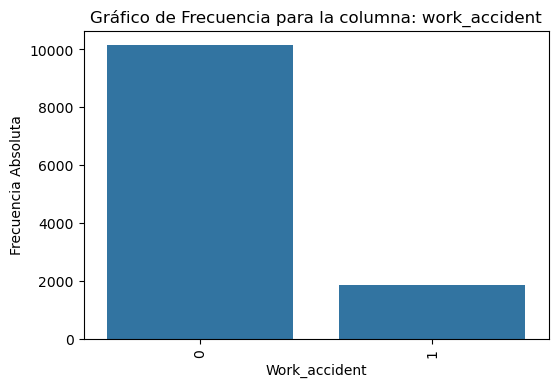

,Frecuencia Relativa (%)
work_accident,
0,84.571762
1,15.428238


In [22]:
eda_uni_cat(data, 'work_accident')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.1254



left,0,1
work_accident,,
0,81.402229,18.597771
1,94.324324,5.675676


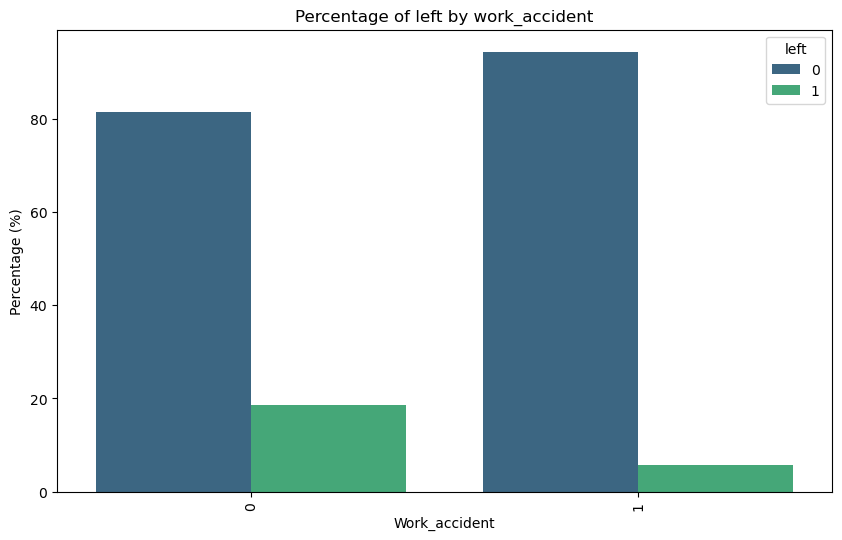

In [39]:
eda_bi_cat(data, 'work_accident', 'left')

### Left

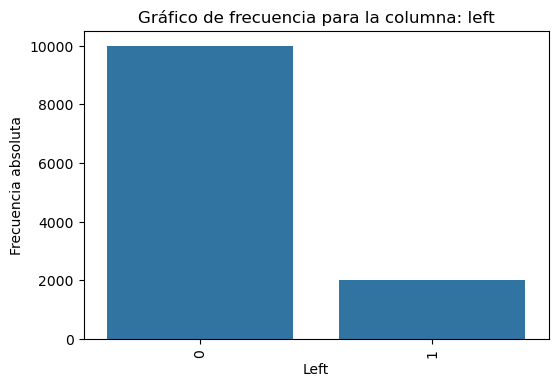

,Frecuencia relativa (%)
left,
0,83.39588
1,16.60412


In [29]:
eda_uni_cat(data, 'left')

### Promotion

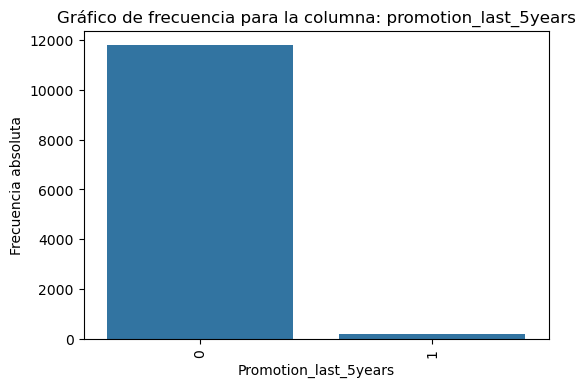

,Frecuencia relativa (%)
promotion_last_5years,
0,98.307064
1,1.692936


In [30]:
eda_uni_cat(data, 'promotion_last_5years')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.0447



left,0,1
promotion_last_5years,,
0,83.177808,16.822192
1,96.059113,3.940887


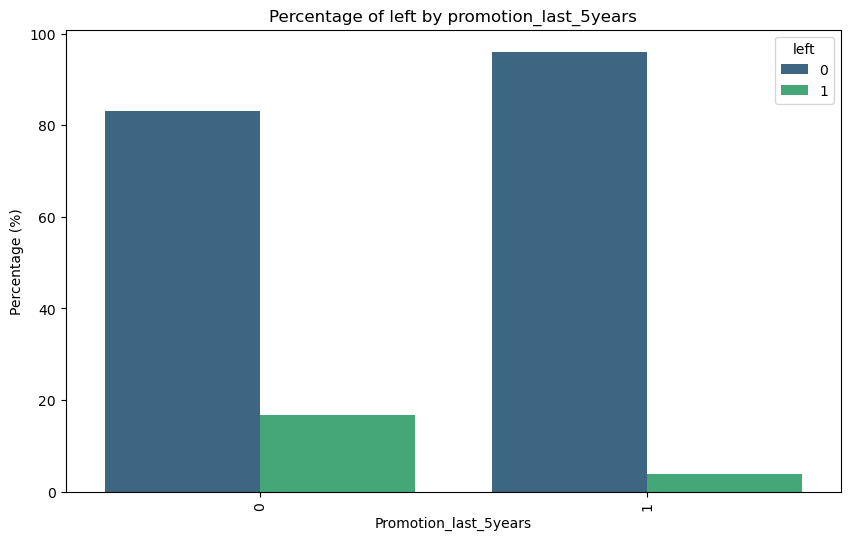

In [40]:
eda_bi_cat(data, 'promotion_last_5years', 'left')

### Department

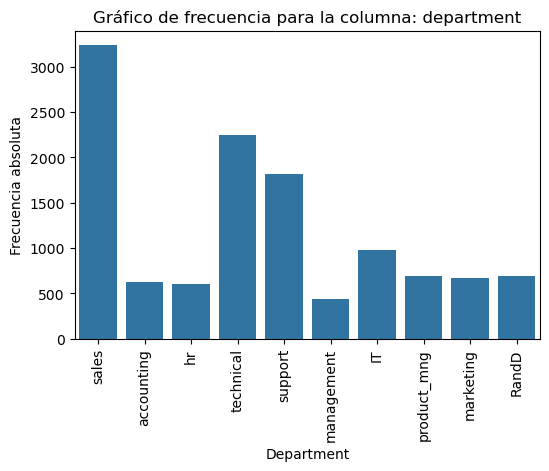

,Frecuencia relativa (%)
department,
sales,27.011926
technical,18.714036
support,15.186390
IT,8.139438
RandD,5.787674
product_mng,5.720957
marketing,5.612543
accounting,5.178884
hr,5.012092


In [41]:
eda_uni_cat(data, 'department')

p-value de Chi-cuadrado: 0.0133
Cramér's V: 0.0417



left,0,1
department,,
IT,83.811475,16.188525
RandD,87.752161,12.247839
accounting,82.447665,17.552335
hr,81.198003,18.801997
management,88.073394,11.926606
marketing,83.358098,16.641902
product_mng,83.965015,16.034985
sales,83.019450,16.980550
support,82.866557,17.133443


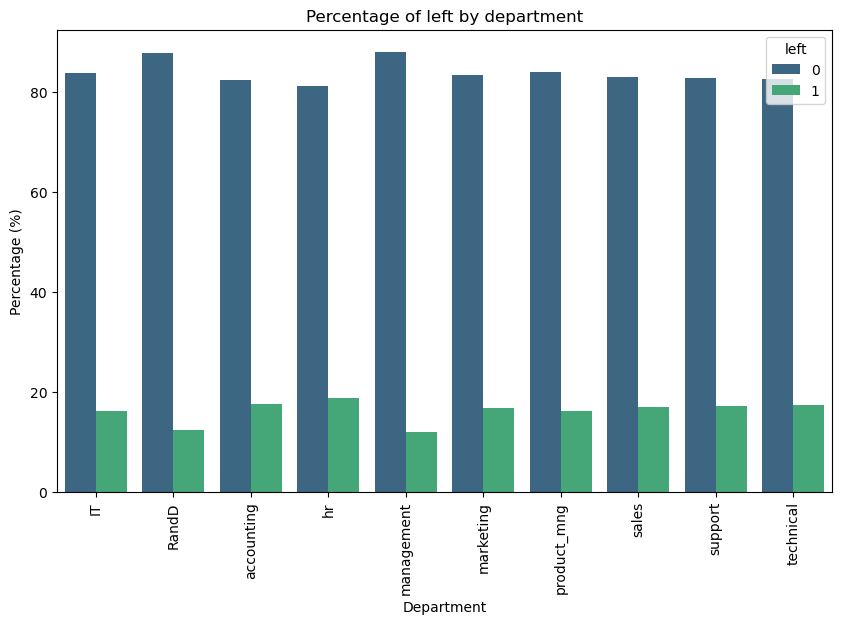

In [42]:
eda_bi_cat(data, 'department', 'left')

### Salary

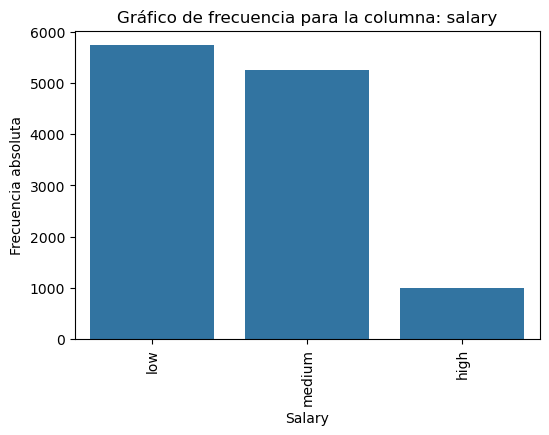

,Frecuencia relativa (%)
salary,
low,47.869235
medium,43.874573
high,8.256192


In [43]:
eda_uni_cat(data, 'salary')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.1209



left,0,1
salary,,
high,95.151515,4.848485
low,79.547038,20.452962
medium,85.383007,14.616993


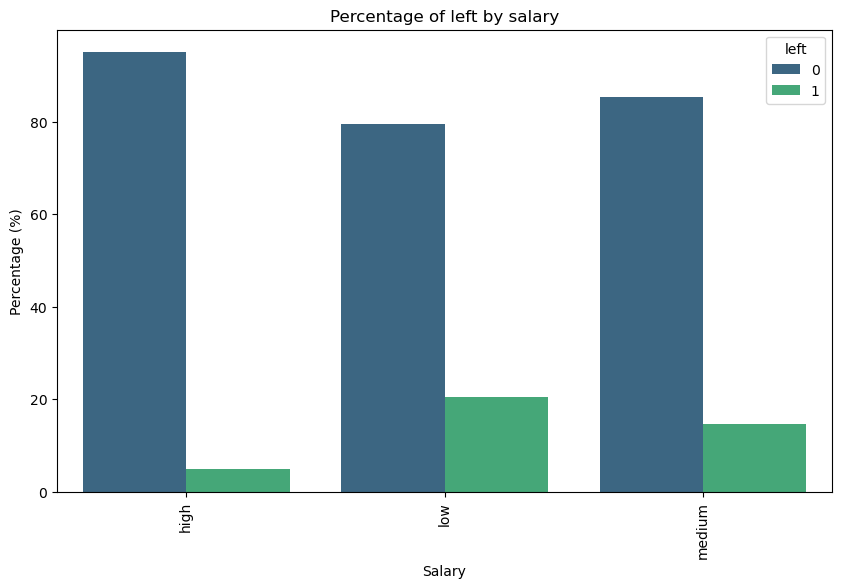

In [44]:
eda_bi_cat(data, 'salary', 'left')

## EDA numerical columns

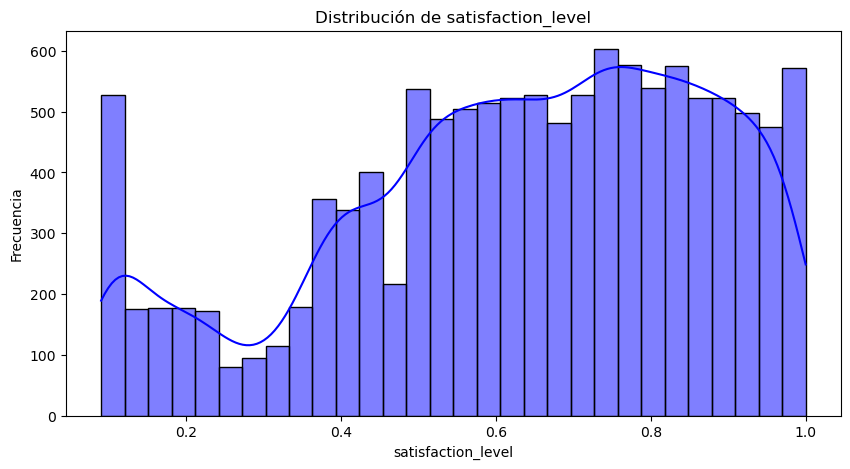

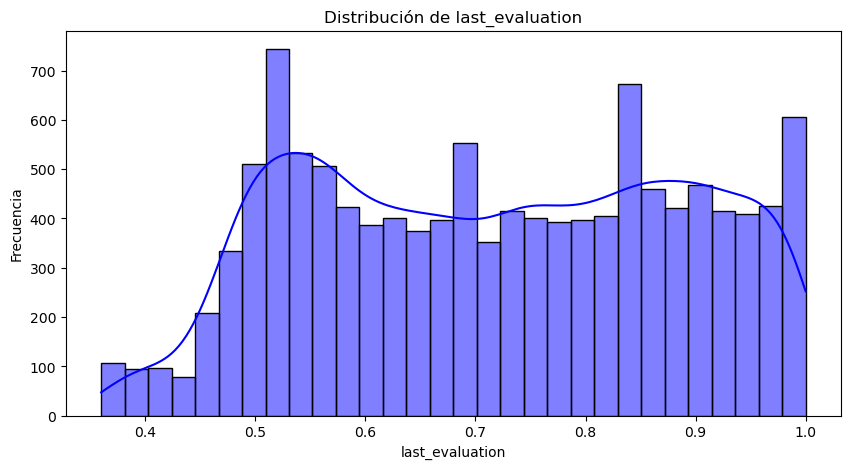

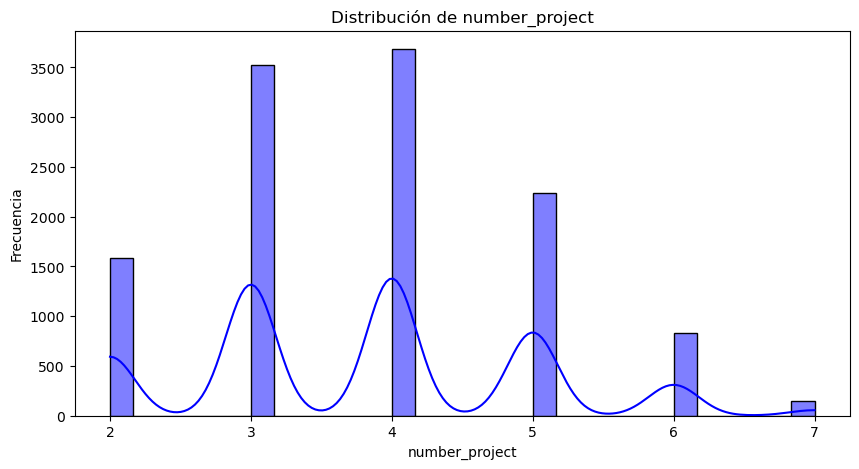

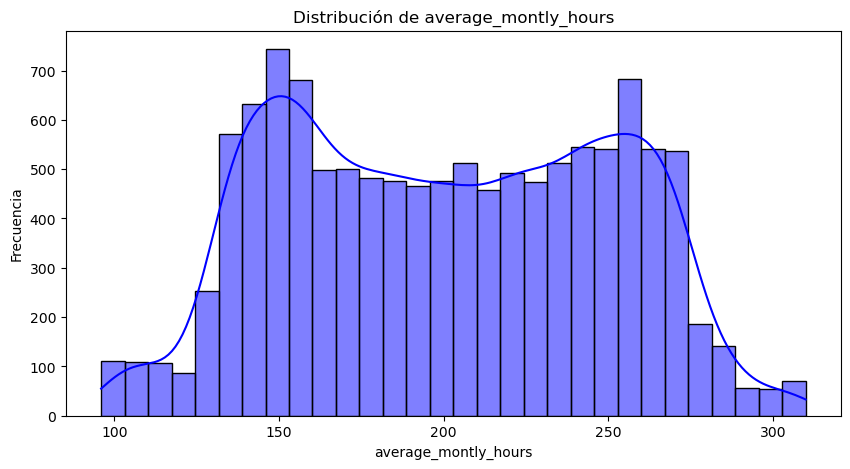

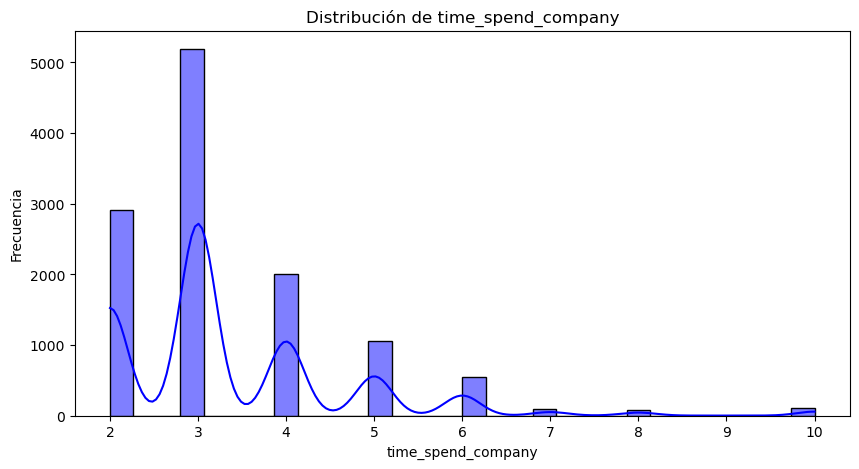

In [ ]:
# Análisis univariable de variables numéricas
for column in data_numerics:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

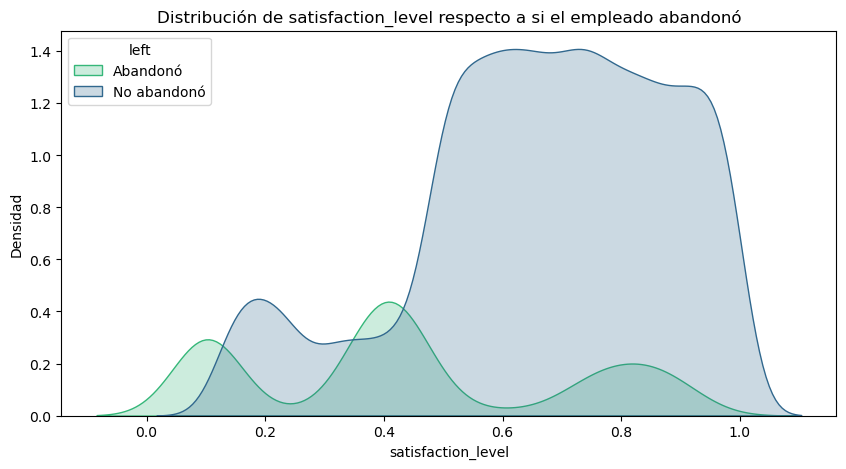

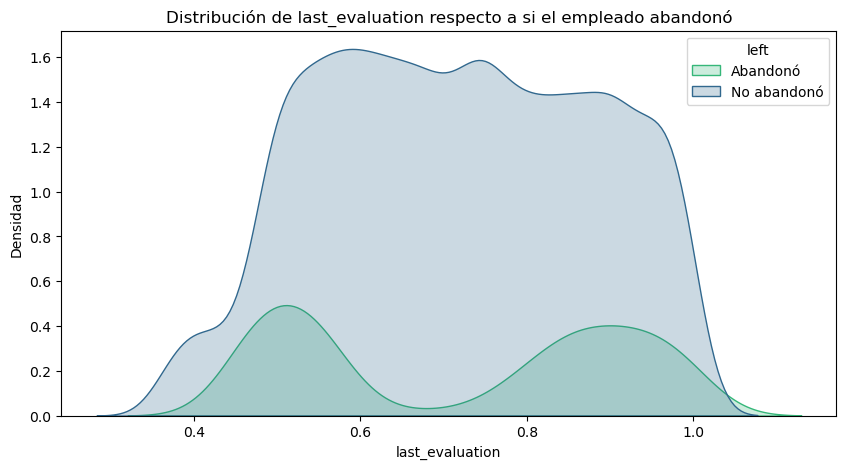

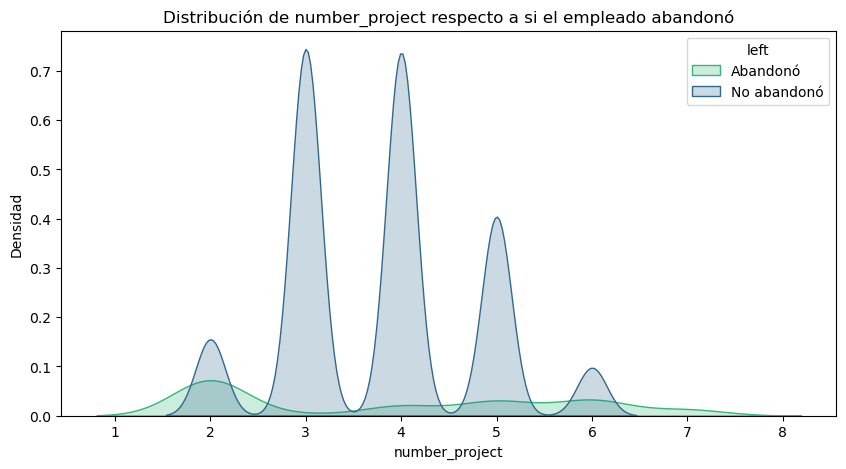

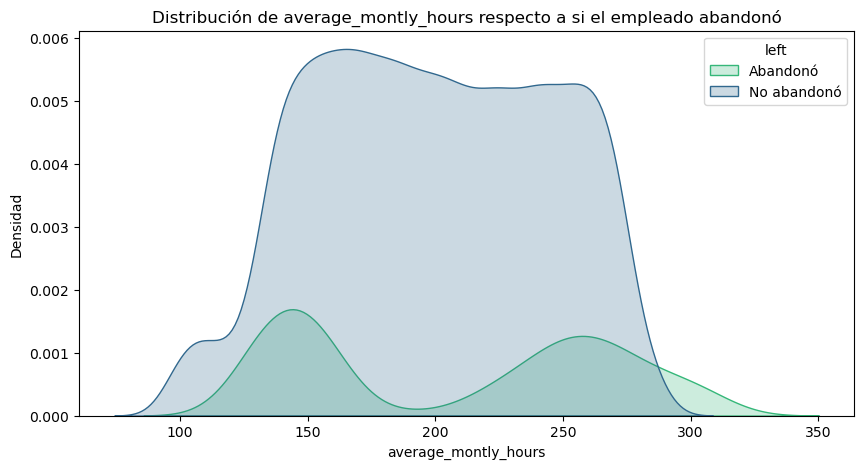

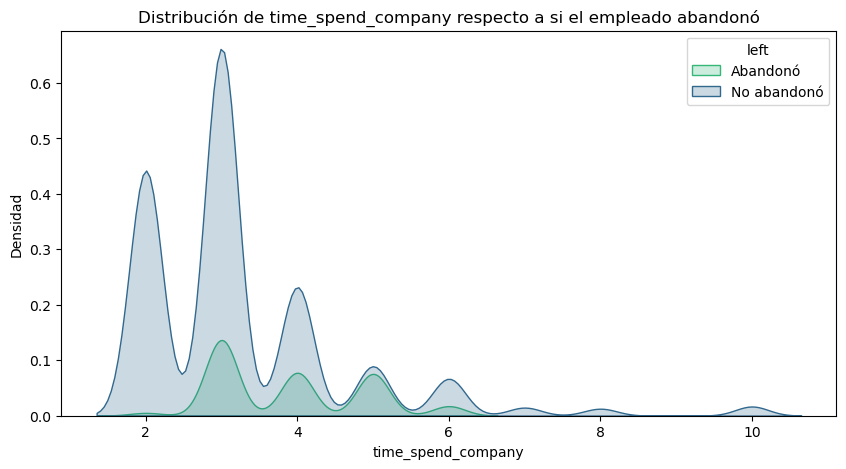

In [ ]:
# Análisis bivariable de variables numéricas respecto a 'left'
for column in data_numerics:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=data, x=column, hue='left', fill=True, palette='viridis')
    plt.title(f'Distribución de {column} respecto a si el empleado abandonó')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.legend(title='left', labels=['Abandonó' , 'No abandonó'])
    plt.show()

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


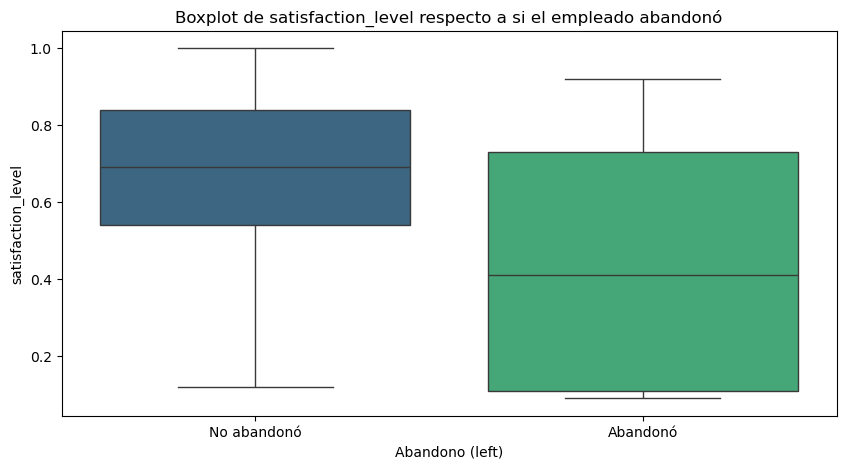

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


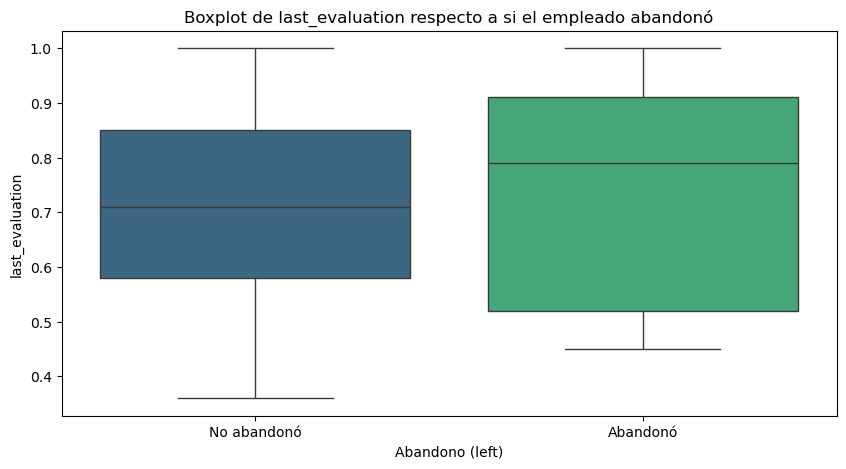

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


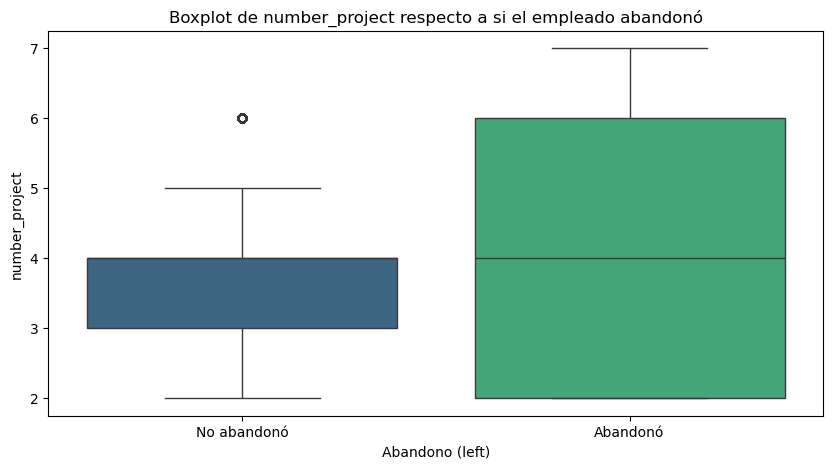

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


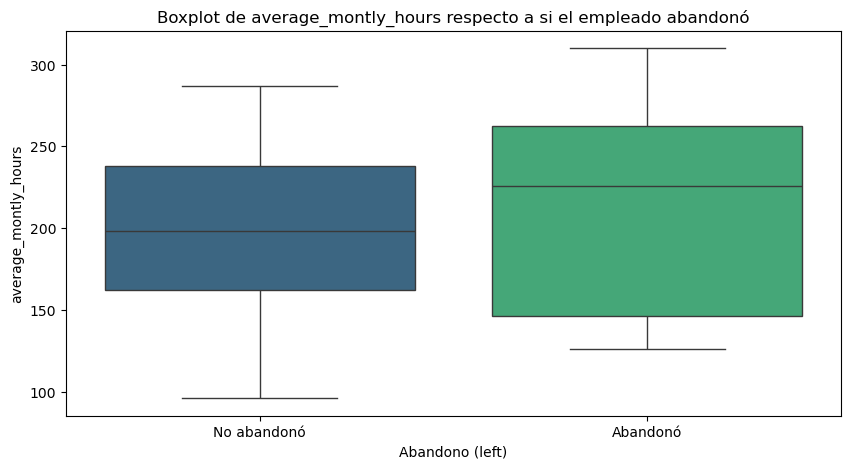

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


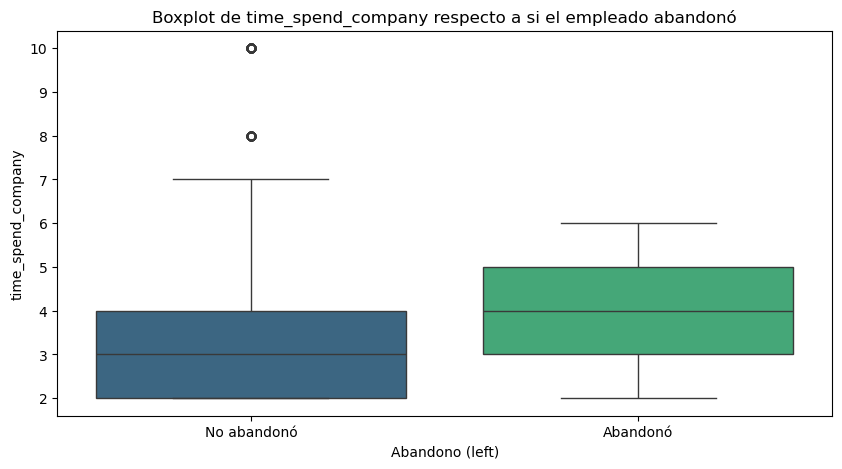

In [ ]:
# Boxplots de las variables numéricas respecto a 'left'
for column in data_numerics:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x='left', y=column, palette='viridis')
    plt.title(f'Boxplot de {column} respecto a si el empleado abandonó')
    plt.xlabel('Abandono (left)')
    plt.ylabel(column)
    plt.xticks([0, 1], ['No abandonó', 'Abandonó'])
    plt.show()